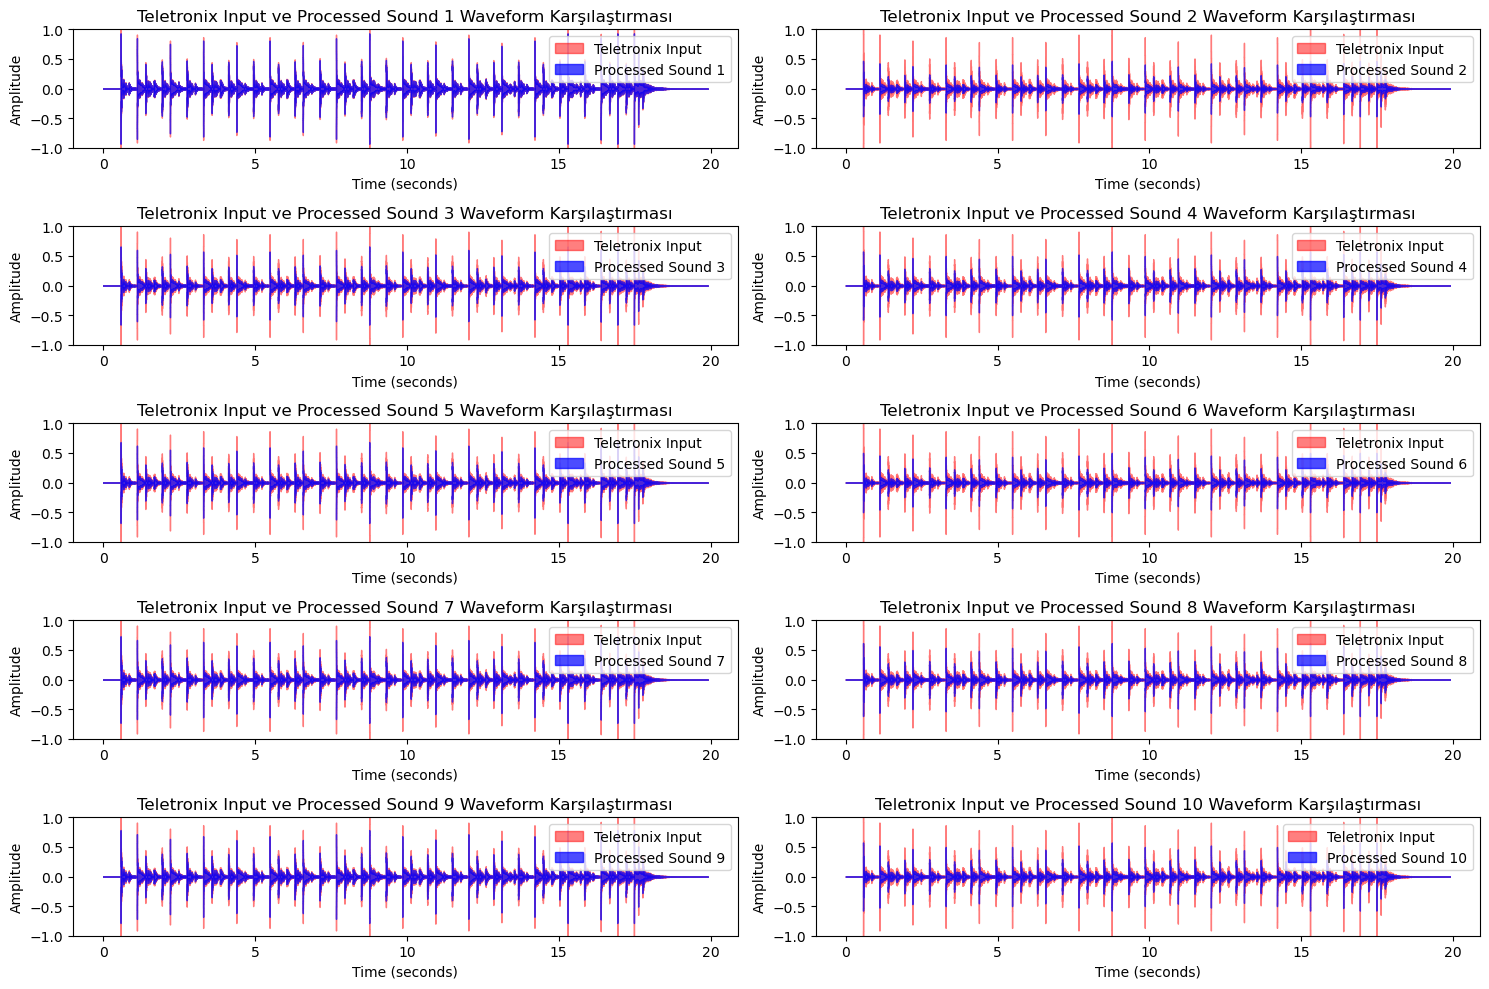

In [20]:
# Librosa sisteminin aktarılması
import matplotlib.pyplot as plt # Grafik ve görselleştirme işlemleri için Matplotlib kütüphanesini yükler.
import numpy as np # Bilimsel hesaplama ve dizi işlemleri için NumPy kütüphanesini yükler.
import librosa # Ses işleme ve analiz için Librosa kütüphanesini yükler.
import librosa.display # Librosa’nın ses grafikleri çizme fonksiyonlarını yükler.
import pyloudnorm as pyln  # LUFS analizini yapar.
import IPython.display as ipd # Ses dosyalarını Jupyter'da çalmak için gerekli IPython fonksiyonlarını yükler.
from IPython.display import Audio, display  # Ses dosyalarını Jupyter hücresinde oynatmaya olanak tanır.

# Ses dosyalarının yollarını bir listeye ekleme
audio_files = [
    "/Users/nazimerensahin/Desktop/fldr/teletro.wav", 
    "/Users/nazimerensahin/Desktop/fldr/22.wav",      
    "/Users/nazimerensahin/Desktop/fldr/33.wav",
    "/Users/nazimerensahin/Desktop/fldr/44.wav",
    "/Users/nazimerensahin/Desktop/fldr/55.wav",
    "/Users/nazimerensahin/Desktop/fldr/66.wav",
    "/Users/nazimerensahin/Desktop/fldr/77.wav",
    "/Users/nazimerensahin/Desktop/fldr/88.wav",
    "/Users/nazimerensahin/Desktop/fldr/99.wav",
    "/Users/nazimerensahin/Desktop/fldr/1010.wav",
    "/Users/nazimerensahin/Desktop/fldr/1111.wav",
]

# Her dosya için açıklayıcı isimler ekleme
audio_labels = [
    "Teletronix Input",
    "Processed Sound 1",
    "Processed Sound 2",
    "Processed Sound 3",
    "Processed Sound 4",
    "Processed Sound 5",
    "Processed Sound 6",
    "Processed Sound 7",
    "Processed Sound 8",
    "Processed Sound 9",
    "Processed Sound 10",
]

# İlk dosya olan Sound1'i yükle
sound1, sr1 = librosa.load(audio_files[0], sr=None)

# Grafik karşılaştırması (Waveform)
plt.figure(figsize=(15, 10))  # Grafik boyutu ayarlandı

# Grafik düzeni: İkili satır (2 sütun)
rows = (len(audio_files) - 1) // 2 + (len(audio_files) - 1) % 2  # Satır sayısını hesapla

# Sound1'i diğer tüm ses dosyalarıyla kıyaslama
for i, (file, label) in enumerate(zip(audio_files[1:], audio_labels[1:]), start=2):
    sound_other, sr_other = librosa.load(file, sr=None)  # Diğer ses dosyasını yükle
    
    # Alt grafik oluşturma
    plt.subplot(rows, 2, i - 1)  # İkili düzen: rows x 2
    librosa.display.waveshow(sound1, sr=sr1, alpha=0.5, color='red', label=audio_labels[0])  # Sound1 dalgası
    librosa.display.waveshow(sound_other, sr=sr_other, alpha=0.7, color='blue', label=label)  # Diğer ses dalgası
    
    # Başlık ve etiketler
    plt.title(f"{audio_labels[0]} ve {label} Waveform Karşılaştırması") # Alt grafik için başlık ekler.
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.legend(loc="upper right")  # Sağ üstte gösterim
    
    plt.ylim((-1, 1))  # Y-eksen sınırları

# Genel düzenleme
plt.tight_layout()
plt.show()  # Grafik çizimi
